# Taller 21 de julio

**Andrés Ospina Patiño**

Simule 100 datos de los siguientes procesos: AR(1), MA(1), ARMA(1,1). Escoja los parametros de forma tal que el proceso sea estacionario, y asuma un error que distribuye normal (0,1). Calcule las autocorrelaciones muestrales de orden 1, 2, 3, 4, y 5, y compare con los valores teóricos esperados.

Repita el proceso con 1000 observaciones y compare los resultados.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import covariance

In [3]:
np.random.seed(47)

$$x_t=\phi x_{t-1} + \epsilon_t$$

In [4]:
def ar_1(phi, x_0, n):
    X_t = [x_0]
    for _ in range(n-1):
        X_t.append(phi * X_t[-1] + np.random.normal())
    return(X_t)

Para garantizar estacionariedad se debe tener $|\phi|<1$

Text(0.5, 0, 't')

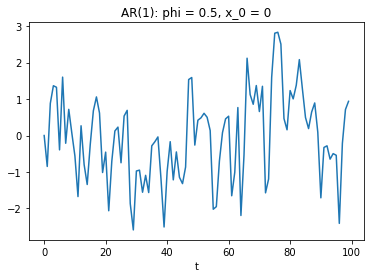

In [5]:
plt.plot(ar_1(0.5, 0, 100))
plt.title("AR(1): phi = 0.5, x_0 = 0")
plt.xlabel("t")

$$x_t={\epsilon}_t - \theta{\epsilon}_{t-1}$$

In [6]:
def ma_1(theta, n):
    epsilon_t = np.random.normal(0, 1, n)
    X_t = [epsilon_t[0]]
    for i in range(1, n):
        X_t.append(epsilon_t[i] - theta * epsilon_t[i-1])
    return(X_t)

Dado que se desea que este modelo sea invertible, se tomará un $|\theta < 1|$

Text(0.5, 0, 't')

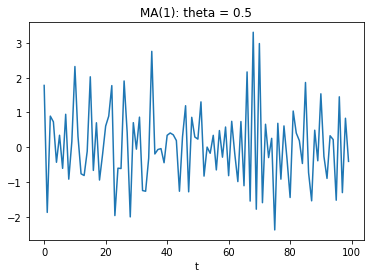

In [7]:
plt.plot(ma_1(0.5, 100))
plt.title("MA(1): theta = 0.5")
plt.xlabel("t")

$$x_t = \phi x_{t-1} + \epsilon_t - \theta{\epsilon}_{t-1}$$

In [8]:
def arma_1(phi, theta, x_0, n):
    epsilon_t = [np.random.normal()]
    X_t = np.array([x_0 + epsilon_t[-1]])
    for _ in range(n-1):
        epsilon_t.append(np.random.normal())
        X_t = np.append(X_t, phi * X_t[-1] + epsilon_t[-1] - theta * epsilon_t[-2])
    return(X_t)

Text(0.5, 0, 't')

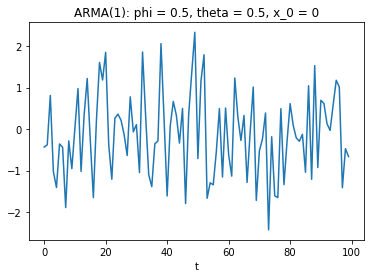

In [9]:
plt.plot(arma_1(0.5, 0.5, 0, 100))
plt.title("ARMA(1): phi = 0.5, theta = 0.5, x_0 = 0")
plt.xlabel("t")

$$\hat{\gamma_j} = \frac{1}{T} \sum_{t=j+1}^T (x_t - \bar{x}_{j+1:T})(x_{t-j} - \bar{x}_{1:T-j})$$

$$\hat{\rho_j} = \frac{\hat{\gamma_j}}{\hat{var(x_t)}}$$

In [10]:
def autocorr(X_t):
    n = len(X_t)
    gammas = []

    for j in range(1, 6):
        gamma_j = 0
        for t in range(j+1, n):
            gamma_j += (X_t[t] - np.mean(X_t[j+1:])) * (X_t[t-j] - np.mean(X_t[:n-j]))
        gammas.append(gamma_j/n)

    return gammas/np.var(X_t)

In [11]:
df = pd.DataFrame({"Autocorrelación en AR(1)": ["rho_1", "rho_2", "rho_3", "rho_4", "rho_5"], "Teórico": [0.5**i for i in range(1, 6)], "Muestral 100": autocorr(ar_1(0.5, 0, 100)), "Muestral 1000": autocorr(ar_1(0.5, 0, 1000))})
df

,Autocorrelación en AR(1),Teórico,Muestral 100,Muestral 1000
0,rho_1,0.50000,0.311752,0.482964
1,rho_2,0.25000,0.063881,0.230239
2,rho_3,0.12500,0.058568,0.136939
3,rho_4,0.06250,0.000089,0.079147
4,rho_5,0.03125,0.084207,0.037403


En cuanto a las autocorrelaciones para el modelo AR(1) se puede observar que hay mejores aproximaciones cuando hay mas observaciones, lo que tienen sentido dado que hay mayor información. Sin embargo las auto correlaciones muestrales para ordenes altos especialmente, no presentan mucha similaridad con el teórico, pero se observa su tendencia a 0.

In [12]:
df = pd.DataFrame({"Autocorrelación en MA(1)": ["rho_1", "rho_2", "rho_3", "rho_4", "rho_5"], "Teórico": [-0.5/(1+0.5**2), 0, 0, 0, 0], "Muestral 100": autocorr(ma_1(0.5, 100)), "Muestral 1000": autocorr(ma_1(0.5, 1000))})
df

,Autocorrelación en MA(1),Teórico,Muestral 100,Muestral 1000
0,rho_1,-0.4,-0.304500,-0.408790
1,rho_2,0.0,-0.195974,-0.001596
2,rho_3,0.0,0.143030,0.010336
3,rho_4,0.0,0.016206,-0.015019
4,rho_5,0.0,0.000696,0.015514


En cuanto a las autocorrelaciones para el modelo MA(1) al igual que en el cso anterior, se obtienen mejor aproximaciones cuando hay mas observaciones. A pesar de no obtener los valores teóricos para las autocorrelaciones de orden mayor a uno, se evidencia que estas son cercanas a 0, por lo tanto se asume que la simulación es correcta.